**DI LUO**

Spring 2020

CS 251B: Data Analysis and Visualization

Project 3: Linear regression

QR-based linear regression and polynomial regression

In [1]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt

import data
import linear_regression

plt.style.use(['seaborn-colorblind', 'seaborn-darkgrid'])
plt.rcParams.update({'font.size': 20})

np.set_printoptions(suppress=True, precision=5)

# Automatically reload external modules
%load_ext autoreload
%autoreload 2

## Notes

- In your implementations, only the following "high level" `scipy`/`numpy` functions can be used:
    - `np.linalg.inv`
    - `scipy.linalg.lstsq` (in `LinearRegression::linear_regression_scipy` only).
    - `np.linalg.norm`
    - (LA section only): `scipy.linalg.solve_triangular`, 

## Task 4: Implement a QR based linear regression solver

### 4a) QR-decomposition

- Write algorithm to compute QR decomposition (`linear_regression::qr_decomposition`). **Run test code below.** Equation for R: $$R = Q^TA$$
- Implement `linear_regression::linear_regression_qr` to use the QR decomposition to do the linear regression. Recall that the equation is $$Rc = Q^Ty$$ which can be solved without taking the inverse of $R$ through backsolving.

#### Test QR decomposition

In [2]:
iris_filename = 'data/iris.csv'
iris_data = data.Data(iris_filename)

A = iris_data.select_data(['sepal_length', 'petal_width'])
A1 = np.hstack([A, np.ones([len(A), 1])])

lin_reg_qr = linear_regression.LinearRegression(iris_data)
myQ, myR = lin_reg_qr.qr_decomposition(A1)

Q, R = np.linalg.qr(A1)

print('NOTE: It is ok if everything is GLOBALLY negated.\n')
print(f'Your Q shape is {myQ.shape} and should be {Q.shape}')
print(f'Your R shape is {myR.shape} and should be {R.shape}')
print(f'1st few rows of your Q are\n{myQ[:3]} and should be\n{Q[:3]}')
print(f'\nYour R is\n{myR[:5]} and should be\n{R[:5]}')

NOTE: It is ok if everything is GLOBALLY negated.

Your Q shape is (150, 3) and should be (150, 3)
Your R shape is (3, 3) and should be (3, 3)
1st few rows of your Q are
[[ 0.07056 -0.11765  0.00009]
 [ 0.0678  -0.11202  0.0339 ]
 [ 0.06503 -0.10638  0.06772]] and should be
[[-0.07056 -0.11765 -0.00009]
 [-0.0678  -0.11202 -0.0339 ]
 [-0.06503 -0.10638 -0.06772]]

Your R is
[[72.27621 15.60873 12.12709]
 [-0.       7.66143 -1.22542]
 [-0.      -0.       1.19668]] and should be
[[-72.27621 -15.60873 -12.12709]
 [  0.        7.66143  -1.22542]
 [  0.        0.       -1.19668]]


#### Test linear regression via QR decomposition

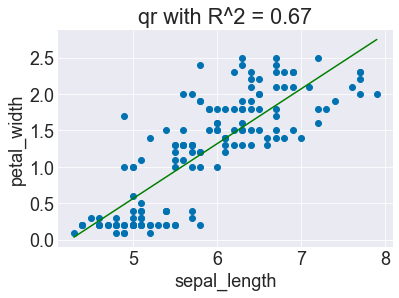

In [3]:
lin_reg_qr.linear_regression(['sepal_length'], 'petal_width', 'qr')
lin_reg_qr.scatter('sepal_length', 'petal_width', 'qr')
lin_reg_qr.show()

**Question 4:** How do your results compare to the built-in SciPy solver? Is this what you expected? Why or why not?

**Answer 4:** The results are the same. It is what I expected since although the method of computing c is different, the purposes of each methods are the same, which is to do linear regression. So the result should be the same.

### Task 4b) Compare performance of the linear regression methods

- Implement `mean_sse` in `linear_regression.py`. **Run test code below**
- In the cell below, load in the brain network `brain.csv` dataset.
- Create `Data` and `LinearRegression` objects.
- Load in the list of variable names in the brain dataset (62)
- Do multiple linear regressions, separately for each of the linear regression methods that you have implemented (including `scipy`): Set all brain data variables except for the last one as the independent variables, the last variable is the depenendent variable.
- Compute the mean sum of squares error (MSSE) in the predictions made by each linear regression model and the actual y values.

**Equation for MSSE:** $$E = \frac{1}{N}\sum_{i=1}^N \left (y_i - \hat{y}_i \right )^2$$

#### Test Mean SSE

In [4]:
# Test with iris data
lin_reg_norm = linear_regression.LinearRegression(iris_data)
lin_reg_norm.linear_regression(['sepal_length'], 'petal_width', 'normal')
print(f'Your Iris mean SSE is {lin_reg_norm.mean_sse():.2f} and should be 0.19')

# Test with passing in random data
np.random.seed(0)
test_data = np.random.rand(iris_data.get_num_samples(), 1)
print(f'Your random data mean SSE is {lin_reg_norm.mean_sse(X=test_data):.2f} and should be 16.72')

Your Iris mean SSE is 0.19 and should be 0.19
Your random data mean SSE is 16.72 and should be 16.72


In [5]:
# Load in the brain network brain.csv dataset
brain_data = data.Data(filepath = "data/brain.csv")
lin_reg_brain = linear_regression.LinearRegression(brain_data)

# Load in the list of variable names in the brain dataset (62)
brain_vars = brain_data.get_headers()

# Do multiple linear regressions
lin_reg_brain.linear_regression(brain_vars[:-1], brain_vars[-1], 'scipy')
print(f'MSSE in the prediction made by Scipy LR is {lin_reg_brain.mean_sse()}.')

lin_reg_brain.linear_regression(brain_vars[:-1], brain_vars[-1], 'normal')
print(f'MSSE in the prediction made by Normal equations LR is {lin_reg_brain.mean_sse()}.')

lin_reg_brain.linear_regression(brain_vars[:-1], brain_vars[-1], 'qr')
print(f'MSSE in the prediction made by QR based LR is {lin_reg_brain.mean_sse()}.')


MSSE in the prediction made by Scipy LR is 5.334472355486481e-26.
MSSE in the prediction made by Normal equations LR is 72600.98236890508.
MSSE in the prediction made by QR based LR is 3.8731199701664955e-21.


**Question 5:** What are the mean sum of squares errors for each of the regression methods on the brain data? Which method(s) do best and which do the worst **and why**?

**Answer 5:** 
- MSSE in the predisction made by Scipy LR is 5.334472355486481e-26.
- MSSE in the predisction made by Normal equations LR is 72600.98236890508.
- MSSE in the predisction made by QR based LR is 3.8731199701664955e-21.

Scipy LR does best since it has the smallest MSSE, indicating that it builds the model that fits the data in the best way among the three methods. The reason why it's good can be that Scipy includes the most efficient way to compute slopes and intercept for linear regression.

QR based LR also do very well (almost as good as Scipy) as it also has a very low MSSE. The reason why it's better than normal equations is that it doesn't have matrix inversion.

Normal equations LR does worst since it has the smallest MSSE. The reasons can be that matrix inversion is computationally intensive to solve and can be easily corrupted by numeric errors. Since the data are decimal values, computing inverse matrix can easily make mistakes (probably when decimal numbers are omitted).

## Task 5: Polynomial Regression

We have been creating linear regression fits of form $y =c_0 + c_1x_1 + c_2x_2 + \ldots$, where $x_i$ are independent variables (columns of $A$) and $c_i$ are corresponding coefficients in $c$. However, this equation only allows us to fit with a line/plane. This may not be the best choice for all datasets.

In this task, you will generalize the linear regression model form to include higher-degree (>1) polynomial terms and explore how this may improve fits to complex data. For example, assume we're doing a single linear regression with independent variable $x_1$ and dependent variable $y$. A linear regression that fits data with a quadratic shape has the form$$y = c_0 + c_1x_1 + c_2x_1^2$$ 

### 5a) Implement polynomial regression

- Implement two methods: `LinearRegression::poly_regression` and `LinearRegression::make_polynomial_matrix` (*helper method*). To implement polynomial regression, recall that you add one or more "independent variables" to $A$, derived from the original column vector $x_1$. For example, if $A$ originally has a column vector for the independent variable $\vec{x_1}$ ($A = [\vec{x_1}]$) and we wanted to make the above quadratic model, we would append $x_1^2$ ($A = [\vec{x_1}, \vec{x_1^2}]$).
- Add support for plotting polynomials in `LinearRegression::scatter`. To do this, you are going to generalize the regression line to a regression polynomial (if `self.p > 1`).
    - Getting your polynomial "x" values: Duplicate your line sample points for $p$ columns then raise each column to the appropriate power.
    - Getting your polynomial "y" values: Use matrix multiplication with your polynomial regression model slopes and/or intercepts.
- Update `predict` to run `make_polynomial_matrix` on `X` to change it if `X` is not `None` and `self.p > 1`.

#### Test `make_polynomial_matrix`

In [6]:
test_A = np.r_[1:10].reshape((9, 1))
test_p = 3

# Test cubic
lin_reg = linear_regression.LinearRegression(data.Data())
print(f'Your polynomial matrix:\n{lin_reg.make_polynomial_matrix(test_A, 3)}')

true_mat = '''
[[  1.   1.   1.]
 [  2.   4.   8.]
 [  3.   9.  27.]
 [  4.  16.  64.]
 [  5.  25. 125.]
 [  6.  36. 216.]
 [  7.  49. 343.]
 [  8.  64. 512.]
 [  9.  81. 729.]]
'''
print('It should look like:\n', true_mat)

Your polynomial matrix:
[[  1.   1.   1.]
 [  2.   4.   8.]
 [  3.   9.  27.]
 [  4.  16.  64.]
 [  5.  25. 125.]
 [  6.  36. 216.]
 [  7.  49. 343.]
 [  8.  64. 512.]
 [  9.  81. 729.]]
It should look like:
 
[[  1.   1.   1.]
 [  2.   4.   8.]
 [  3.   9.  27.]
 [  4.  16.  64.]
 [  5.  25. 125.]
 [  6.  36. 216.]
 [  7.  49. 343.]
 [  8.  64. 512.]
 [  9.  81. 729.]]



### 5b) Fitting data with polynomial regression

- In the cell below, load in `poly_data_1.csv`, make a `Data` object, make a `LinearRegression` object based off it like usual.

In [7]:
poly_data = data.Data(filepath = "data/poly_data_1.csv")
lin_reg_poly = linear_regression.LinearRegression(poly_data)

#### (i) Run polynomial regression on `poly_data_1` and plot results with `p=1`

- Run `poly_regression` with the polynomial degree $p = 1$. Solve using the normal equations.
- Use `scatter` to plot the results below.
- Print out the mean sum of squares error.

The plot created by running the below cell should "look right" to you.

MSSE in the prediction is 59.599210975703954.


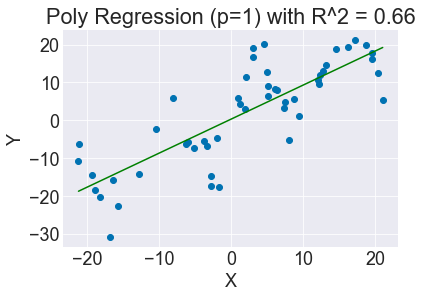

In [8]:
lin_reg_poly.poly_regression('X', 'Y', 1)
lin_reg_poly.scatter('X', 'Y', "Poly Regression (p=1)")
print(f'MSSE in the prediction is {lin_reg_poly.mean_sse()}.')

#### (ii) Higher degree polynomials

In the cell below,
- Run `poly_regression` on the same datset with `p = 5`.
- Plot the results.
- Print out the mean squared error.

MSSE in the prediction is 49.80778219474408.


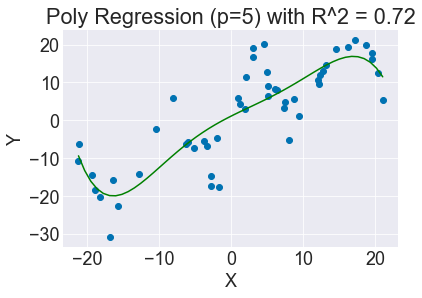

In [9]:
lin_reg_poly.poly_regression('X', 'Y', 5)
lin_reg_poly.scatter('X', 'Y', "Poly Regression (p=5)")
print(f'MSSE in the prediction is {lin_reg_poly.mean_sse()}.')

**Question 6:** Describe the fit compared to `p=1` — is it better or worse? Why?

**Question 7:** Describe what happens as you experiment with the polynomial degree between 1 and 5.

**Answer 6:** Better than p=1 since R^2 is greater and MSSE is smaller.

**Answer 7:** As I experiment with degree between 1 and 5 (1, 2, 3, 4, 5), R^2 increases and MSSE decreases, meaning that the model fits the data better as the polynomial degree increases from 1 to 5.

#### (iii) Check overfitting

Now you will check to see how the $p=5$ polynomial regression model generalizes to new data. 

- Load in `poly_data_2.csv`, which is the 2nd half of the `poly_data_1` dataset, make a new `Data` object, etc.
- Run `scatter` to show a scatterplot and the polynomial regression of the `poly_data_2` data, but use the polynomial regression model fit to the `poly_data_1`. Do this by replacing the `Data` object in `LinearRegression` object with the one holding `poly_data_2`. Use `set_data()`; do NOT run `poly_regression` again. You want to use the same fitted slopes/intercept from `poly_data_1`.
- Print out the mean sum of squared error obtained when predicting the `poly_data_2` using the regression model fit on `poly_data_1`. Do this by passing in the data column `X` selected from `poly_data_2` as a column vector ndarray.

MSSE in the prediction is 79.81817770033928.


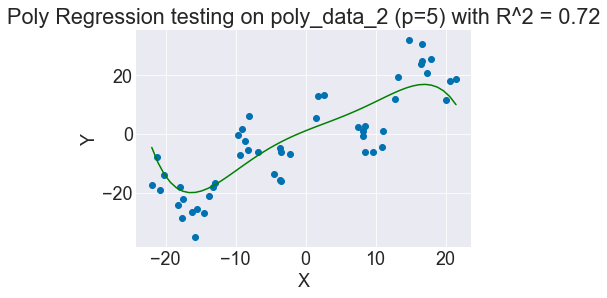

In [10]:
poly_data_2 = data.Data(filepath = "data/poly_data_2.csv")

# replacing the Data object in LinearRegression object with the one holding poly_data_2
lin_reg_poly.set_data(poly_data_2)

lin_reg_poly.scatter('X', 'Y', "Poly Regression testing on poly_data_2 (p=5)")

x=lin_reg_poly.data.select_data('X')
lin_reg_poly.y = lin_reg_poly.data.select_data('Y')
print(f'MSSE in the prediction is {lin_reg_poly.mean_sse(X=x)}.')

**Question 8:** Describe how the fitted coefficients obtained for `poly_data_1` do on `poly_data_2`. Do they do a good or bad job? Why?

**Answer 8:** Bad job, since MSSE is high, meaning that the model doesn't fit the data well. The reason is either the polynomial regression model is overfitting or underfitting. In this case, the polynomial regression model is more likely to be underfitting since the shape of poly_data_2 data is more complex than the polynomial regression model.

#### (iv) Even higher degree polynomials

In the cell below, experiment with fitting and plotting `poly_data_1` again, but this time with an even higher degree polynomial `p=19`.

Be sure to:
- Fit the higher degree polynomial to the `poly_data_1` data.
- Plot the results for both `poly_data_1` and `poly_data_2`.
- Print out the MSSE for both `poly_data_1` and `poly_data_2`
- Like you did with `p = 5`, experiment how the results transfer to `poly_data_2` (i.e. do NOT re-run `poly_regression` after fitting coefficients to `poly_data_1`.

**Question 9:** What's going on with the higher degree polynomial fit and $R^2$?

**Question 10:** Compare the results for `poly_data_1` and `poly_data_2`. Back up your observations with numbers (e.g. MSSE).

**Answer 9:** Higher degree polynomial fit gives higher R^2 since it goes through more points than lower degree ones.  The fit is better since MSSE is 11.52, which is much smaller than that of lower degree ones (around 50).

**Answer 10:** Talking with MSSE, MSSE for poly_data_1 is around 11.52 but that for poly_data_2 is around 78.10, meaning that the model is overfitting. The result is as bad as when p=5, which gives a MSSE of 79.82 when evaluating poly_data_2 on poly_data_1's LR. Talking with the shape, I think the model is better than that when p=5 since the model fits both poly_data_1 and poly_data_2 better.

MSSE in the prediction is 11.521604890714562.


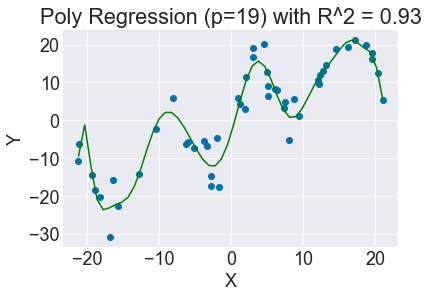

In [11]:
# poly_data_1
poly_data = data.Data(filepath = "data/poly_data_1.csv")
lin_reg_poly = linear_regression.LinearRegression(poly_data)

# Fit the higher degree polynomial to the poly_data_1 data
lin_reg_poly.poly_regression('X', 'Y', 19)

# Plot the results for poly_data_1
lin_reg_poly.scatter('X', 'Y', "Poly Regression (p=19)")

# Print out the MSSE for poly_data_1
print(f'MSSE in the prediction is {lin_reg_poly.mean_sse()}.')

MSSE in the prediction is 78.09989877205338.


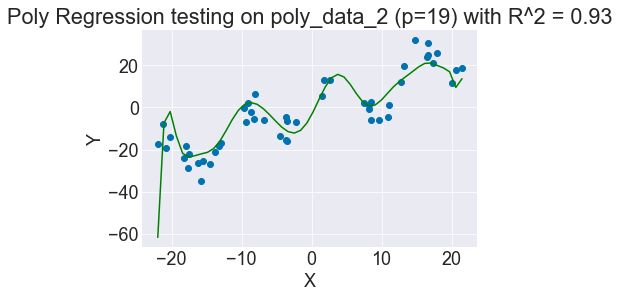

In [12]:
# poly_data_2
poly_data_2 = data.Data(filepath = "data/poly_data_2.csv")

# replacing the Data object in LinearRegression object with the one holding poly_data_2
lin_reg_poly.set_data(poly_data_2)

lin_reg_poly.scatter('X', 'Y', "Poly Regression testing on poly_data_2 (p=19)")

x=lin_reg_poly.data.select_data('X')
lin_reg_poly.y = lin_reg_poly.data.select_data('Y')
print(f'MSSE in the prediction is {lin_reg_poly.mean_sse(X=x)}.')

## Extensions

To receive credit for any extension, you must:
- Not modify / prevent any code from the core project from working (e.g. make a copy before changing). In other words, **the notebook test code should still work!**
- **You must describe what you did and what you found in detail**. This includes a summary of parameter values used in your simulations.
- Include (*labeled!*) plots and/or numbers to present your results.
- Write up your extensions below or in a separate notebook.

**Rule of thumb: one deep, thorough extension is worth more than several quick, shallow extensions!**

**Reminder:** Give credit to all sources, including anyone that you consulted.

### 1. Your own data

- Run linear regression on datasets that interest you. Identify your hypotheses about the association between variables and test them out. Make plots and report all relevant metrics fit.

### 2. Linear regression algorithm comparison

- Compare the linear regression methods that you implemented on a dataset of your choice.
- Research and implement matrix condition number. Find a dataset with a poor matrix condition number and then compare the regression methods. Which does best and why?

#### Extension: Research and implement matrix condition number
Condition number of matrix indicates if a matrix is well-conditioned or ill-conditioned. In a system of Ac=y, where A is the matrix, c is the independent variable vector and y is the dependent variable vecter, if there is a small change in A, a well-conditioned matrix A will result in a small change in y, and a ill-conditioned matrix A will result in a larger change in y. From the definition, we can see that a well-conditioned matrix is less sensitive to small changes than ill-conditioned ones, meaning that well-conditioned is more stable.

The condition number cond[A] is computed by norm(A)\*norm(A^-1), and a well-conditioned matrix has cond[A] close to 1.0, while a ill-conditioned one has cond[A] larger than 1.0. The method for computing the condition number of a matrix is implemented in linear_regression.py named condition_number().

Then I computed the condition number for the independent data in brain.csv, which I examed in task 4b. The result is 922.61, which is much higher than 1. The result interprets why linear regression with normal equations has bad results, which is that the matrix of independent data A is ill-conditioned, so that small change in A will result in significant change in the dependent data vector. This may cause problem when working with matrix inversion, which happens a lot in LR with normal equations. The other two methods, LR with scipy and LR with QR, avoid matrix inversion, so their results look good. 
In task 4b: 
- MSSE in the predisction made by Scipy LR is 5.334472355486481e-26.
- MSSE in the predisction made by Normal equations LR is 72600.98236890508.
- MSSE in the predisction made by QR based LR is 3.8731199701664955e-21.

The result shows that LR with normal equations has significant disadvantage when independent variable matrix is ill-conditioned.

Later I computed the condition number for testdata52.csv by making variable D0-D3 as ind_vars and D4 as dep_var. The resulting condition number is 3.86, which is much closer to 1 so the results of each methods are the same, meaning that LR with normal equations doesn't has disadvantages.

Source: https://www.youtube.com/watch?v=GDYmWtWWtNQ

In [13]:
# Load in the brain network brain.csv dataset
brain_data = data.Data(filepath = "data/brain.csv")
lin_reg_brain = linear_regression.LinearRegression(brain_data)

# Load in the list of variable names in the brain dataset (62)
brain_vars = brain_data.get_headers()

lin_reg_brain.linear_regression(brain_vars[:-1], brain_vars[-1], 'scipy')

print(f'Condition number for independent data in brain.csv is {lin_reg_brain.condition_number(lin_reg_brain.A)}.')

Condition number for independent data in brain.csv is 922.6095943869739.


In [14]:
# Load in the brain network testdata52.csv dataset
testdata52_data = data.Data(filepath = "data/testdata52.csv")
lin_reg_testdata52 = linear_regression.LinearRegression(testdata52_data)

lin_reg_testdata52.linear_regression(['D0', 'D1', 'D2', 'D3'], 'D4', 'scipy')

print(f'Condition number for independent data in testdata52.csv is {lin_reg_testdata52.condition_number(lin_reg_testdata52.A)}.')

print(f'MSSE in the prediction made by Scipy LR is {lin_reg_testdata52.mean_sse()}.')

# Do other linear regressions
lin_reg_testdata52.linear_regression(['D0', 'D1', 'D2', 'D3'], 'D4', 'normal')
print(f'MSSE in the prediction made by Normal equations LR is {lin_reg_testdata52.mean_sse()}.')

lin_reg_testdata52.linear_regression(['D0', 'D1', 'D2', 'D3'], 'D4', 'qr')
print(f'MSSE in the prediction made by QR based LR is {lin_reg_testdata52.mean_sse()}.')


Condition number for independent data in testdata52.csv is 3.861207067412818.
MSSE in the prediction made by Scipy LR is 1.2875631656943989.
MSSE in the prediction made by Normal equations LR is 1.2875631656943989.
MSSE in the prediction made by QR based LR is 1.2875631656943989.


### 3. Confidence intervals or other kinds of error bars on linear regression plots

- Add the option to plot 95% confidence intervals on the linear regression predictions in your plot functions (e.g. `scatter`).

### 4. Overfitting

- Run polynomial regression on other datasets. What degree polynomial works well? When do you overfit?

#### Extension: Run polynomial regression on other datasets
For this extension I worked on the data from lab4: the training data in **lab4-400-training.csv** and the testing data in **lab4-100-testing.csv**. We used the data column "x" as independent variable and "y1" as dependent variable in lab but didn't use y2 or y3, so I will use y2 and y3 in training data and test the model with the testing data. I implemented poly_scatter( ) in linear_regression.py, which has the parameters:
- train_data: Data object. Data for training to find the regression model
- test_data: Data object. Data for testing the regression model
- ind_var: string. Independent variable name
- dep_var: string. Dependent variable name
- p: int. The highest polynomial degree

The function takes in the training and testing data and plot both data with their polynomial regressions for 1st degree through pth degree. It also shows the R2 value for both the training data and the testing data.

To begin with, I run the function with independent variable 'x' and 'y2'.

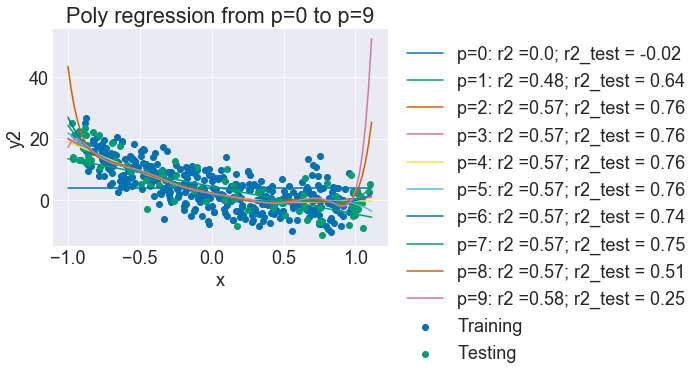

In [15]:
training_data = data.Data(filepath = "data/lab4-400-training.csv")
testing_data = data.Data(filepath = "data/lab4-100-testing.csv")
lin_reg = linear_regression.LinearRegression(training_data)

lin_reg.poly_scatter(training_data, testing_data, 'x', 'y2', 9)

The result shows that when p=0 / 1, the model is underfitting since r2 and r2 test are lower than the highest value. When p=2 / 3 / 4 / 5, the model is fitting the model in the best way since they has relatively high r2 value and the highest r2 test value, meaning that they fit both the training data and the testing data well. When p>5, the model is overfitting since r2_test starts decreasing from the highest value, meaning that the model is no longer fitting the testing data. This is because the higher degree models try to imitate the training data, in which they are influenced by noise instead of focusing on the general shape.

In conclusion, p=2 will be the best solution since it has the lowest polynomial degree and process (one of) the strongest ability in generalization.

Next, I investigate in 'x' and 'y3'.

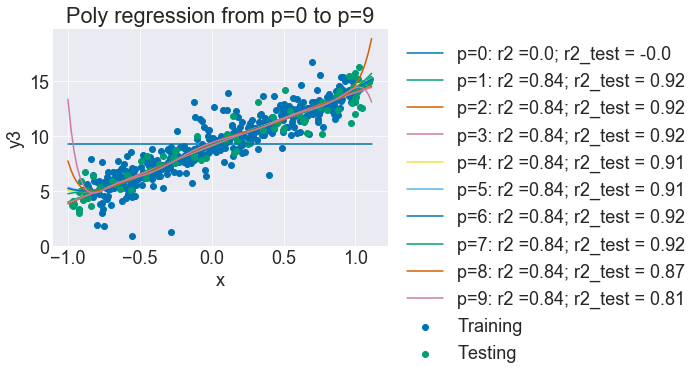

In [16]:
lin_reg.poly_scatter(training_data, testing_data, 'x', 'y3', 9)

The result shows that when p=0, the model is underfitting since r2 and r2 test are lower than the highest value. When p=2-7, the model is fitting the model in the best way since they has relatively high r2 value and the highest r2 test value, meaning that they fit both the training data and the testing data well. When p>7, the model is overfitting since r2_test starts decreasing from the highest value, meaning that the model is no longer fitting the testing data. 

In conclusion, p=1 will be the best solution since it has the lowest polynomial degree and process (one of) the strongest ability in generalization.